# Linear Regression - Project Exercise
## Imports
### Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline Import sklearn as needed

In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Get the Data 
We'll work with the Ecommerce Customers csv file. It has Customer info, such as Email and Address. Then it also has numerical value columns:

 * Avg. Session Length: Average session of in-store style advice sessions.
 * Time on App: Average time spent on App in minutes
 * Time on Website: Average time spent on Website in minutes
 * Length of Membership: How many years the customer has been a member.
#### Read in the Ecommerce Customers csv file as a DataFrame called customers.

EC = {Ecommerce Customers}

In [5]:
EC=pd.read_csv("Ecommerce Customers.csv") ## read the csv file 
EC.head() ## give the first 5-ROW and all columns

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
EC.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
EC.info() ##( infomation about (range of index),(class of data set),(datatype)
# we have three object type  atteibute, five float tpye attribute 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [11]:
## Find the NA value in the data set
EC.isnull().sum() ## we can see that  no null value present  

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

# Exploratory Data Analysis

#### Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


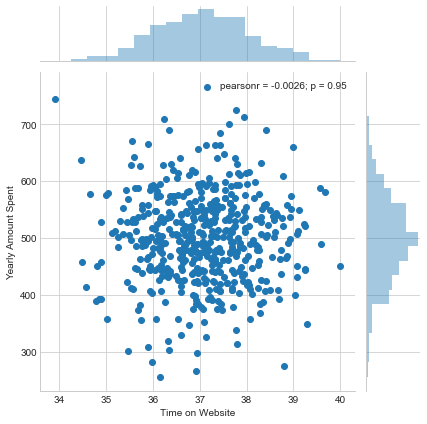

In [14]:
#set style of sns
sns.set_style('whitegrid')

sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = EC)

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


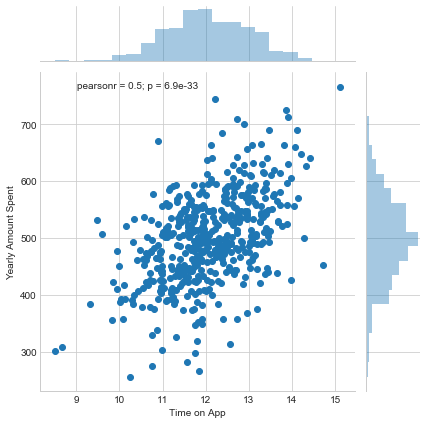

In [15]:
# Do the same but with the Time on App column instead.
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data =EC)

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


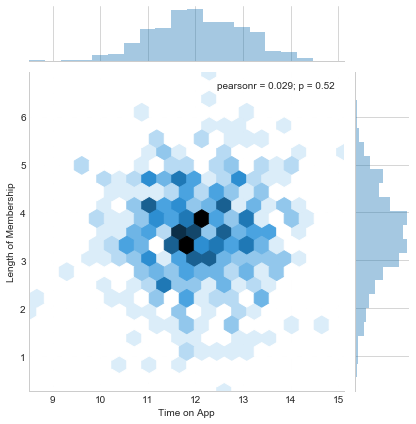

In [20]:
##Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

sns.jointplot('Time on App', 'Length of Membership', data = EC, kind = 'hex')

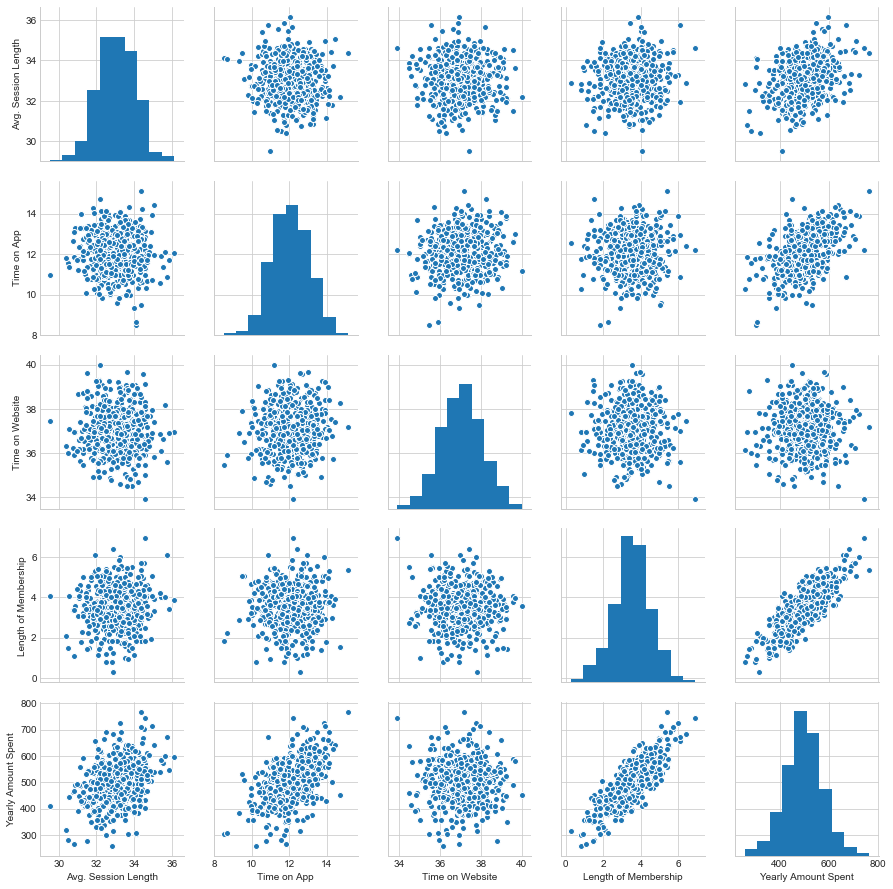

In [21]:
 ## Let's explore these types of relationships across the entire data set. 
    # Use pairplot to recreate the plot below.(Don't worry about the the colors)
    
sns.pairplot(EC)

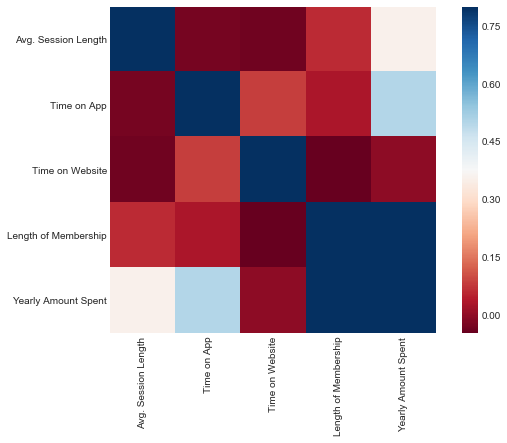

In [22]:
### correlation matrix 
matrix = EC.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="RdBu");

# we can see that { length of membership}& {Yearly Amount Spent} is highly correlated (more then 0.75 )

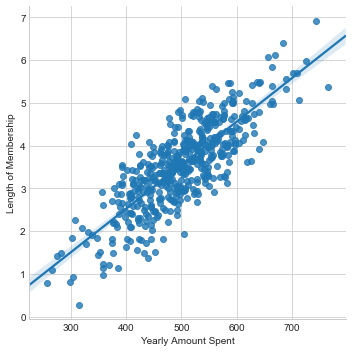

In [23]:
## Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership.

sns.lmplot('Yearly Amount Spent', 'Length of Membership', data = EC)

# Training and Testing Data 
### * feature of matrix(X)
### * dependent variable (Y)

In [31]:
X = EC[EC.columns[-5:-1]]

y = EC['Yearly Amount Spent']
X[0:3],  y[0:3]

(   Avg. Session Length  Time on App  Time on Website  Length of Membership
 0            34.497268    12.655651        39.577668              4.082621
 1            31.926272    11.109461        37.268959              2.664034
 2            33.000915    11.330278        37.110597              4.104543,
 0    587.951054
 1    392.204933
 2    487.547505
 Name: Yearly Amount Spent, dtype: float64)

# Splitting the dataset into training & test dataset

In [32]:
### splitting the data set into the training and test data set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=0)

# Training the Model

In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # Create an instance of a LinearRegression() model named lm.
lm.fit(X_train, y_train) # Train/fit lm on the training data.


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
##Print out the coefficients of the model

print('Coef \n',lm.coef_)


('Coef \n', array([25.88815047, 38.87046474,  0.47066154, 61.78369022]))


# Predicting Test Data

In [35]:
# Use lm.predict() to predict off the X_test set of the data.
predictions = lm.predict(X_test)


Text(0,0.5,'predicted Y')

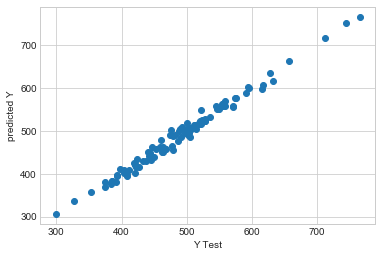

In [37]:
# Create a scatterplot of the real test values versus the predicted values.
plt.scatter(y_test,predictions)
plt.xlabel("Y Test")
plt.ylabel("predicted Y")

# Evaluating the Model

In [38]:
# Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 7.64567479891527)
('MSE:', 92.8901030449852)
('RMSE:', 9.637951185028133)


# Residuals
 
#You should have gotten a very good model with a good fit.
#Let's quickly explore the residuals to make sure everything was okay with our data.

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


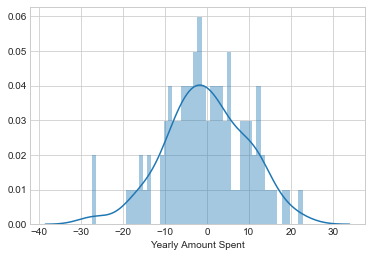

In [39]:
# Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

sns.distplot((y_test - predictions), bins = 50)

In [40]:
# Conclusion

#Should the ecommerce company focus its efforts on the mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.
#Let's see if we can interpret the coefficients at all to get an idea.

# Recreate the dataframe below.

df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
df

,Coefficient
Avg. Session Length,25.888150
Time on App,38.870465
Time on Website,0.470662
Length of Membership,61.783690
